## Lecture 13 Map making in Python

Map making in Python involves utilizing various libraries and tools to create visually appealing and informative maps for geospatial analysis and visualization. One of the key libraries used for this purpose is GeoPandas, which extends the capabilities of Pandas to support geospatial data. GeoPandas allows users to easily read, manipulate, analyze, and visualize geospatial datasets, such as shapefiles and GeoJSON files. With GeoPandas, users can perform operations like overlaying multiple layers, creating choropleth maps, and adding custom markers to maps. Another option we have is the Altair, which recently also add the options for interactive geospatial data visualization. Whether for academic research, urban planning, environmental monitoring, or business intelligence, map making in Python with GeoPandas offers a versatile and efficient solution for geospatial data analysis and visualization needs. 

In the lecture, we will cover
- the format for geospatial data
- reading and processing geospatial data
- creating choropleth maps
- cutomizing the color and legend
- adding multiple layers to the maps
- creating interactive maps

In [1]:
#pip install geopandas geodatasets mapclassify

### Geospatial data resource and format

A .shp file, short for Shapefile, is a commonly used file format in geospatial data analysis and mapping. It stores vector data, including points, lines, and polygons, along with associated attributes. Shapefiles are widely supported by GIS (Geographic Information Systems) software and libraries, making them a popular choice for storing and sharing geospatial datasets. They consist of multiple files, including a main .shp file containing the geometric data, a .shx file containing the shape index, and a .dbf file containing attribute data. 

#### Plotly

Plotly is a powerful library in Python for creating interactive maps and visualizations. It offers built-in support for various types of maps, including scatter plots on geographical coordinates, choropleth maps (where regions are shaded according to data values), and bubble maps that vary point sizes based on metrics. With Plotly’s intuitive API, users can quickly create maps by linking datasets with country codes, state abbreviations, or latitude and longitude coordinates. The library supports multiple map projections such as Mercator, orthographic, and natural earth, enabling diverse applications like global visualizations and regional analytics. Plotly’s interactivity enhances user experience, allowing zooming, panning, and hovering over points to display contextual information. Additionally, maps can be customized with colors, titles, and tooltips, and they can be embedded in web applications or exported as HTML for seamless sharing. 

In [2]:
import pandas as pd
import plotly.express as px

crime = pd.read_csv("us_statewide_crime.csv")
crime.head()

,State,Violent_Crime,Murder_Rate,Poverty,High_School,College,Single_Parent,Unemployed,Metropolitan
0,Alabama,486,7.4,14.7,77.5,20.4,26.0,4.6,70.2
1,Alaska,567,4.3,8.4,90.4,28.1,23.2,6.6,41.6
2,Arizona,532,7.0,13.5,85.1,24.6,23.5,3.9,87.9
3,Arkansas,445,6.3,15.8,81.7,18.4,24.7,4.4,49.0
4,California,622,6.1,14.0,81.2,27.5,21.8,4.9,96.7


In [3]:
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'District of Columbia': 'DC'
}

# Create a new column with state abbreviations
crime['Code'] = crime['State'].map(state_abbreviations)

In [4]:
crime.head()

px.choropleth(
    crime,
    locations='Code',
    locationmode='USA-states',
    scope = 'usa',
    color = 'Violent_Crime',
    hover_name='State',
    hover_data = ['Violent_Crime', 'Murder_Rate']

)

| **Map Type**               | **Key Parameters**                                      | **Scope/Mode**              |
|----------------------------|--------------------------------------------------------|-----------------------------|
| **State-Level US Map**      | `locations='Code'`, `locationmode='USA-states'`         | `scope='usa'`               |
| **World Map**               | `locations='iso_alpha'`, `projection='natural earth'`   | Global                      |
| **Scatter Map**             | `lat='Latitude'`, `lon='Longitude'`                    | Global or Regional          |
| **Region Maps**             | `scope='europe'`, `locations='iso_alpha'`              | Europe, Africa, Asia, etc.  |
| **Bubble Map**              | `size='Value'`, `lat`, `lon`                           | Global or Regional          |
| **Heatmap on Map**          | `z='Value'`, `lat`, `lon`                              | Mapbox                      |


#### Altair 

Altair also provides powerful options in the geospatial map making. In the vega dataset, some base maps have already been updated and stored as GeoJson data. 

In [5]:
import altair as alt
from vega_datasets import data

world = data.world_110m.url
world

world_geo = alt.topo_feature(world, 'countries')
world_geo

alt.Chart(world_geo).mark_geoshape()

alt.Chart(...)

In [6]:
alt.Chart(world_geo).mark_geoshape(
    fill = 'white',
    stroke = 'black',
    strokeWidth = 0.5
).project(
    #type = 'naturalEarth1'
    type = 'mercator'
)

alt.Chart(...)

In [7]:
alt.Chart(world_geo).mark_geoshape(
    fill = 'white',
    stroke = 'black',
    strokeWidth = 0.5
).project(
    #type = 'naturalEarth1'
    #type = 'mercator', scale = 400, translate = [100, 500]
    type = 'mercator', scale = 200, translate = [-220, 250]
)

alt.Chart(...)

In [8]:
zipcodes = data.zipcodes.url
zipcodes

'https://vega.github.io/vega-datasets/data/zipcodes.csv'

In [9]:
alt.Chart(zipcodes).transform_calculate(
    digit = 'datum.zip_code[0]'
).mark_square(
    size = 1
).encode(
    longitude = 'longitude:Q',
    latitude = 'latitude:Q',
    color = 'digit:N'
).project(
    type = 'albersUsa'
).properties(
    width = 800, height = 500
)

alt.Chart(...)

In [10]:
usa = data.us_10m.url
airports = data.airports.url
flights = data.flights_airport.url

In [11]:
alt.layer(

    alt.Chart(alt.topo_feature(usa, 'states')).mark_geoshape(
        fill = '#ddd', stroke = '#fff', strokeWidth = 1
    ),

    alt.Chart(airports).mark_circle(size = 8).encode(
        longitude='longitude:Q',
        latitude='latitude:Q',
        tooltip='iata:N'
    )

).project(
    type = 'albersUsa'
).properties(
    width = 800, height = 500
)

alt.LayerChart(...)

In [12]:
alt.layer(

    alt.Chart(alt.topo_feature(usa, 'states')).mark_geoshape(
        fill = '#ddd', stroke = '#fff', strokeWidth = 1
    ),

    alt.Chart(flights).mark_circle().transform_aggregate(
        groupby=['origin'],
        routes = 'count()'
    ).transform_lookup(
        lookup='origin',
        from_ = alt.LookupData(data = airports, key = 'iata',
                               fields = ['state', 'latitude', 'longitude'])
    ).encode(
        latitude='latitude:Q',
        longitude='longitude:Q',
        size = alt.Size('routes:Q', scale = alt.Scale(range = [0, 1000])),
        tooltip=['origin:N', 'routes:Q']
    )

).project(
    type = 'albersUsa'
).properties(
    width = 800, height = 500
)

alt.LayerChart(...)

In [13]:
unemp = data.unemployment.url
unemp

'https://vega.github.io/vega-datasets/data/unemployment.tsv'

In [14]:
alt.Chart(alt.topo_feature(usa, 'counties')).mark_geoshape(
    stroke='white', strokeWidth=0.25
).transform_lookup(
    lookup='id',
    from_= alt.LookupData(data = unemp, key = 'id', fields = ['rate'])
).encode(
    color = alt.Color('rate:Q', 
                      scale = alt.Scale(domain=[0, 0.3], range = ['lightblue', 'darkblue']),
                      legend = alt.Legend(format = "%")),
    tooltip = alt.Tooltip('rate:Q', format = '.0%')
).project(
    type = 'albersUsa'
).properties(
    width = 800, height = 500
)

alt.Chart(...)

#### Geoda and Geopanda

GeoDa, short for Geographic Data Analysis, is a powerful open-source software tool designed for exploratory spatial data analysis (ESDA). In this lecture, we will use the geospatial data from

https://www.naturalearthdata.com/downloads/

https://geodacenter.github.io/data-and-lab/

In [15]:
import geopandas
import geodatasets

chicago = geopandas.read_file(geodatasets.get_path("geoda.chicago_commpop"))
chicago.head()

,community,NID,POP2010,POP2000,POPCH,POPPERCH,popplus,popneg,geometry
0,DOUGLAS,35,18238,26470,-8232,-31.099358,0,1,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,36,5918,6110,-192,-3.142390,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,37,2876,3420,-544,-15.906433,0,1,"MULTIPOLYGON (((-87.6288 41.80189, -87.62879 4..."
3,GRAND BOULEVARD,38,21929,28006,-6077,-21.698922,0,1,"MULTIPOLYGON (((-87.60671 41.81681, -87.6067 4..."
4,KENWOOD,39,17841,18363,-522,-2.842673,0,1,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."


In [16]:
groceries = geopandas.read_file(geodatasets.get_path("geoda.groceries"))
groceries.head()

,OBJECTID,Ycoord,Xcoord,Status,Address,Chain,Category,geometry
0,16,41.973266,-87.657073,OPEN,"1051 W ARGYLE ST, CHICAGO, IL. 60640",VIET HOA PLAZA,None,MULTIPOINT (1168268.672 1933554.35)
1,18,41.696367,-87.681315,OPEN,"10800 S WESTERN AVE, CHICAGO, IL. 60643-3226",COUNTY FAIR FOODS,None,MULTIPOINT (1162302.618 1832900.224)
2,22,41.868634,-87.638638,OPEN,"1101 S CANAL ST, CHICAGO, IL. 60607-4932",WHOLE FOODS MARKET,None,MULTIPOINT (1173317.042 1895425.426)
3,23,41.877590,-87.654953,OPEN,"1101 W JACKSON BLVD, CHICAGO, IL. 60607-2905",TARGET/SUPER,new,MULTIPOINT (1168996.475 1898801.406)
4,27,41.737696,-87.625795,OPEN,"112 W 87TH ST, CHICAGO, IL. 60620-1318",FOOD 4 LESS,None,MULTIPOINT (1176991.989 1847262.423)


In [17]:
boston = geopandas.read_file('boston')
boston.head()

,DISTRICT,WDPCT,Ward1,Precinct1,State_WDPC,Gov_Coun_2,Rep_2022,Senate_202,Congress_2,Shape_Leng,Shape_Le_1,Shape_Area,shape_wkt,geometry
0,01-01,0101,01,01,01-01,6th,1st,3rd,7.0,25400.690015,0.205182,0.001375,None,"POLYGON ((-70.97289 42.35361, -70.97509 42.343..."
1,01-02,0102,01,02,01-02,6th,1st,3rd,7.0,2367.211463,0.018724,0.000021,None,"POLYGON ((-71.03523 42.36774, -71.03624 42.368..."
2,01-03,0103,01,03,01-03,6th,1st,3rd,7.0,5269.564918,0.040993,0.000062,None,"POLYGON ((-71.03523 42.36774, -71.03538 42.367..."
3,01-04,0104,01,04,01-04,6th,1st,3rd,7.0,4898.501719,0.039088,0.000051,None,"POLYGON ((-71.04611 42.37481, -71.04169 42.374..."
4,01-05,0105,01,05,01-05,6th,1st,3rd,7.0,4050.658075,0.032472,0.000044,None,"POLYGON ((-71.03698 42.37397, -71.03691 42.374..."


#### Create the geospatial data from columns

In [18]:
from shapely.geometry import Point

groceries1 = groceries.copy()
groceries1['geometry'] = [Point(xy) for xy in zip(groceries1['Xcoord'], 
                                                  groceries1['Ycoord'])]
groceries1.head()

,OBJECTID,Ycoord,Xcoord,Status,Address,Chain,Category,geometry
0,16,41.973266,-87.657073,OPEN,"1051 W ARGYLE ST, CHICAGO, IL. 60640",VIET HOA PLAZA,None,POINT (-87.657 41.973)
1,18,41.696367,-87.681315,OPEN,"10800 S WESTERN AVE, CHICAGO, IL. 60643-3226",COUNTY FAIR FOODS,None,POINT (-87.681 41.696)
2,22,41.868634,-87.638638,OPEN,"1101 S CANAL ST, CHICAGO, IL. 60607-4932",WHOLE FOODS MARKET,None,POINT (-87.639 41.869)
3,23,41.877590,-87.654953,OPEN,"1101 W JACKSON BLVD, CHICAGO, IL. 60607-2905",TARGET/SUPER,new,POINT (-87.655 41.878)
4,27,41.737696,-87.625795,OPEN,"112 W 87TH ST, CHICAGO, IL. 60620-1318",FOOD 4 LESS,None,POINT (-87.626 41.738)


#### Merge the geospatial data with attributes

In [19]:
crime.head()

,State,Violent_Crime,Murder_Rate,Poverty,High_School,College,Single_Parent,Unemployed,Metropolitan,Code
0,Alabama,486,7.4,14.7,77.5,20.4,26.0,4.6,70.2,AL
1,Alaska,567,4.3,8.4,90.4,28.1,23.2,6.6,41.6,AK
2,Arizona,532,7.0,13.5,85.1,24.6,23.5,3.9,87.9,AZ
3,Arkansas,445,6.3,15.8,81.7,18.4,24.7,4.4,49.0,AR
4,California,622,6.1,14.0,81.2,27.5,21.8,4.9,96.7,CA


In [20]:
state = geopandas.read_file("ne_110m_admin_1_states_provinces")
state.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.0595 49.00..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.9678 47.95..."


In [21]:
import pandas as pd

full = pd.merge(state, crime, left_on = 'name', right_on = 'State', how = 'outer')
full.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,State,Violent_Crime,Murder_Rate,Poverty,High_School,College,Single_Parent,Unemployed,Metropolitan,Code
0,Admin-1 scale rank,2,USA-3541,3541,US-AL,http://en.wikipedia.org/wiki/Alabama,US,5,Alabama,AL|Ala.,...,Alabama,486,7.4,14.7,77.5,20.4,26.0,4.6,70.2,AL
1,Admin-1 scale rank,2,USA-3563,3563,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6,Alaska,AK|Alaska,...,Alaska,567,4.3,8.4,90.4,28.1,23.2,6.6,41.6,AK
2,Admin-1 scale rank,2,USA-3520,3520,US-AZ,http://en.wikipedia.org/wiki/Arizona,US,1,Arizona,AZ|Ariz.,...,Arizona,532,7.0,13.5,85.1,24.6,23.5,3.9,87.9,AZ
3,Admin-1 scale rank,2,USA-3528,3528,US-AR,http://en.wikipedia.org/wiki/Arkansas,US,1,Arkansas,AR|Ark.,...,Arkansas,445,6.3,15.8,81.7,18.4,24.7,4.4,49.0,AR
4,Admin-1 scale rank,2,USA-3521,3521,US-CA,http://en.wikipedia.org/wiki/California,US,8,California,CA|Calif.,...,California,622,6.1,14.0,81.2,27.5,21.8,4.9,96.7,CA


In [22]:
county = geopandas.read_file("ne_10m_admin_2_counties")
county.head()

,FEATURECLA,SCALERANK,ADM2_CODE,ISO_3166_2,ISO_A2,ADM0_SR,NAME,NAME_ALT,NAME_LOCAL,TYPE,...,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,geometry
0,Admin-2 scale rank,0,USA-53073,US-53,US,1,Whatcom,Whatcom County,None,County,...,Whatcom,Уотком,Whatcom,Whatcom,Вотком,واٹکم کاؤنٹی، واشنگٹن,Whatcom,霍特科姆县,霍特科姆縣,"MULTIPOLYGON (((-122.75302 48.99251, -122.6532..."
1,Admin-2 scale rank,0,USA-53047,US-53,US,1,Okanogan,Okanogan County,None,County,...,Okanogan,Оканоган,Okanogan,Okanogan,Оканоґан,اوکاناگن کاؤنٹی، واشنگٹن,Okanogan,奥卡诺根县,奧卡諾根縣,"POLYGON ((-120.85196 48.99251, -120.67495 48.9..."
2,Admin-2 scale rank,0,USA-53019,US-53,US,1,Ferry,Ferry County,None,County,...,Ferry,Ферри,Ferry,Ferry,Феррі,فیری کاؤنٹی، واشنگٹن,Ferry,费里县,費里縣,"POLYGON ((-118.83688 48.99251, -118.69668 48.9..."
3,Admin-2 scale rank,0,USA-53065,US-53,US,1,Stevens,Stevens County,None,County,...,Stevens,Стивенс,Stevens,Stevens,Стівенс,سٹیونس کاؤنٹی، واشنگٹن,Stevens,史蒂文斯县,史蒂文斯縣,"POLYGON ((-118.21996 48.99251, -118.03723 48.9..."
4,Admin-2 scale rank,0,USA-53051,US-53,US,1,Pend Oreille,Pend Oreille County,None,County,...,Pend Oreille,Панд-Орей,Pend Oreille,Pend Oreille,Понд-Орей,پینڈ اورائل کاؤنٹی، واشنگٹن,Pend Oreille,庞多雷县,龐多雷縣,"POLYGON ((-117.42951 48.99251, -117.37787 48.9..."


In [23]:
# FIPS: Federal Information Processing System
# https://www.bls.gov/respondents/mwr/electronic-data-interchange/appendix-d-usps-state-abbreviations-and-fips-codes.htm

### processing geospatial data and making a map

<Axes: >

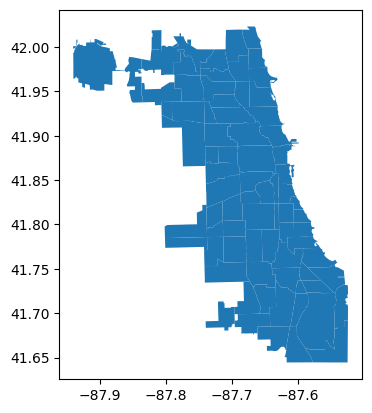

In [24]:
chicago.head()
chicago.plot()

<Axes: >

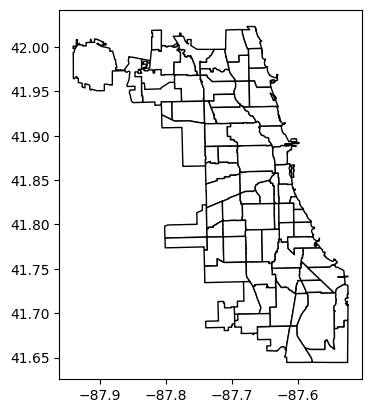

In [25]:
chicago.plot(color = 'white', edgecolor = 'black')

C:\Users\nawib\AppData\Local\Temp\ipykernel_18408\1083196521.py:1: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




<Axes: >

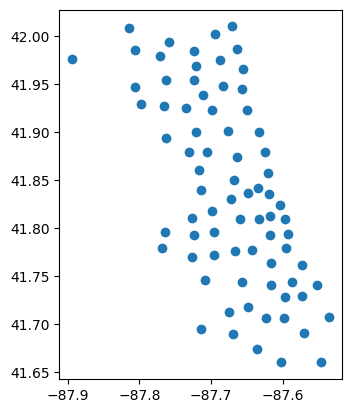

In [26]:
chicago['centroid'] = chicago.centroid
chicago.head()
chicago = chicago.set_geometry('centroid')
chicago.plot()

<Axes: >

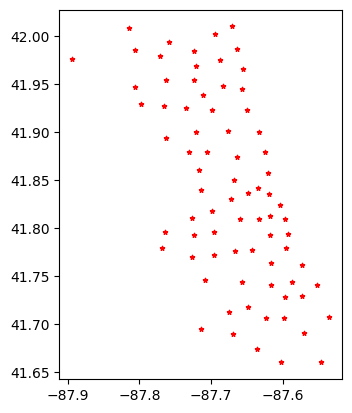

In [27]:
chicago.plot(marker = '*', color = 'red', markersize = 10)

#### In-class activities 1

- Extract the MA county information from the county data and only plot for the MA county with boundary. 

<Axes: >

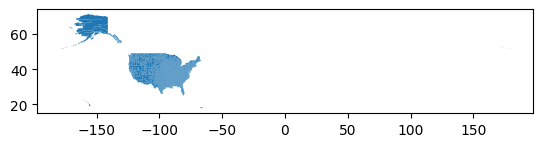

In [28]:
county.plot()

              FEATURECLA  SCALERANK  ADM2_CODE ISO_3166_2 ISO_A2  ADM0_SR  \
297   Admin-2 scale rank          0  USA-25005      US-25     US        1   
299   Admin-2 scale rank          0  USA-25023      US-25     US        1   
300   Admin-2 scale rank          0  USA-25001      US-25     US        1   
301   Admin-2 scale rank          0  USA-25021      US-25     US        1   
302   Admin-2 scale rank          0  USA-25025      US-25     US        1   
303   Admin-2 scale rank          0  USA-25009      US-25     US        1   
421   Admin-2 scale rank          0  USA-25019      US-25     US        1   
422   Admin-2 scale rank          0  USA-25007      US-25     US        1   
1196  Admin-2 scale rank          0  USA-25027      US-25     US        1   
1198  Admin-2 scale rank          0  USA-25003      US-25     US        1   
1199  Admin-2 scale rank          0  USA-25013      US-25     US        1   
1309  Admin-2 scale rank          0  USA-25011      US-25     US        1   

<Axes: >

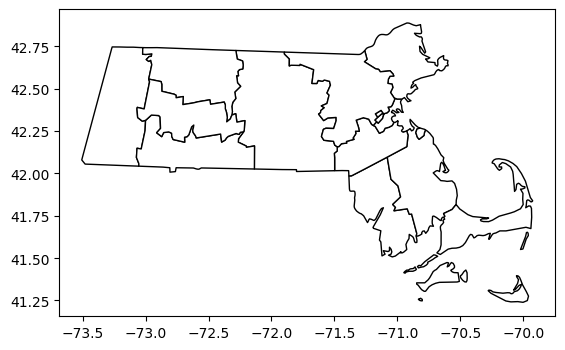

In [29]:
MA = county[county['ISO_3166_2'] == 'US-25']
print(MA)
MA.plot(color = 'white', edgecolor = 'black')

### creating choropleth maps and customization

Choropleth maps are a type of thematic map that represent spatial data through color gradients or shading. They use color-coded areas, such as countries, states, or administrative regions, to visualize quantitative data, with darker or lighter shades indicating higher or lower values respectively. 

<Axes: >

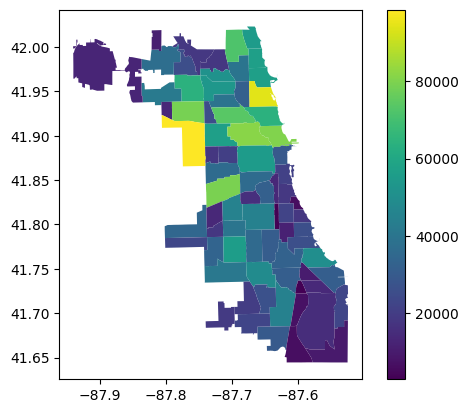

In [30]:
chicago.head()
chicago = chicago.set_geometry('geometry')
chicago.plot(column = 'POP2010', legend = True)

<Axes: >

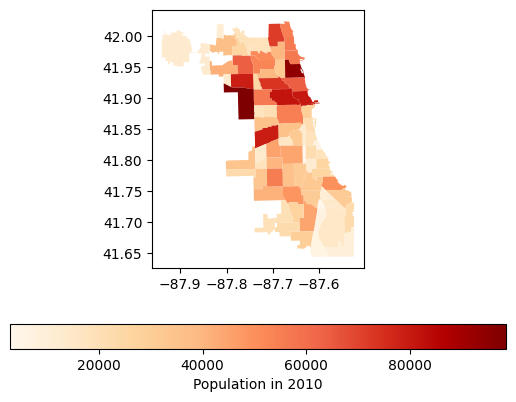

In [31]:
# https://matplotlib.org/stable/users/explain/colors/colormaps.html

chicago.plot(column = 'POP2010', legend = True, cmap = 'OrRd', 
                legend_kwds = {'label': 'Population in 2010', 'orientation': 'horizontal'})


<Axes: >

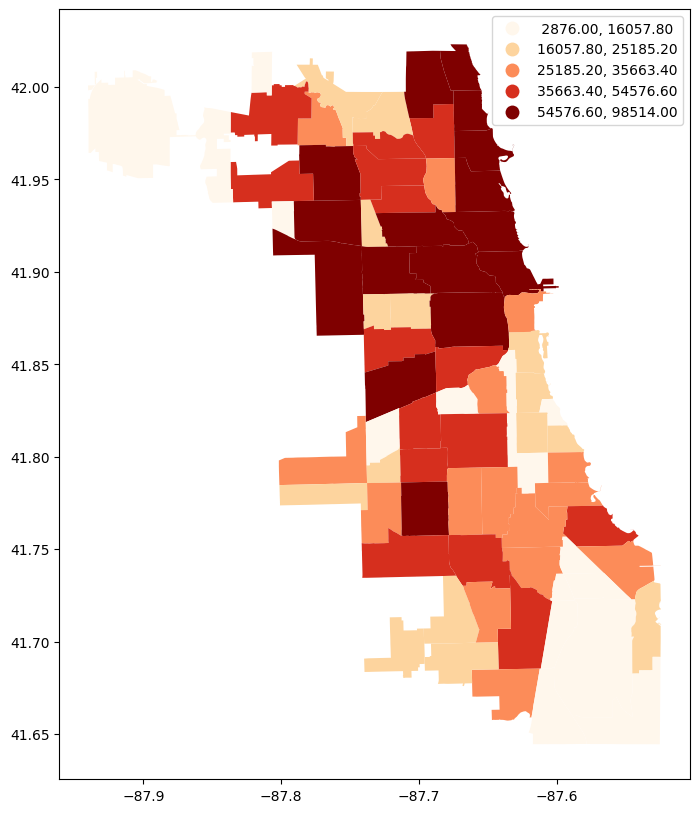

In [32]:
chicago.plot(
    column = 'POP2010',
    cmap = 'OrRd',
    scheme = 'quantiles', 
    legend = True, 
    figsize = (15, 10)
)

### Missing values

In [33]:
import numpy as np

chicago.loc[np.random.choice(chicago.index, 20), 'POP2000'] = np.nan

<Axes: >

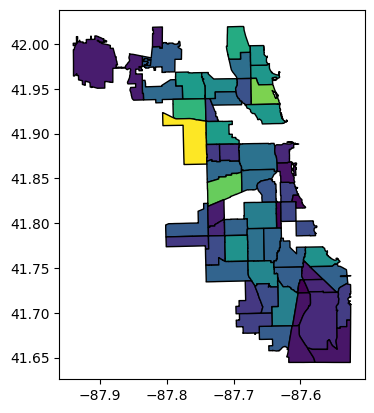

In [34]:
chicago.plot(column = 'POP2000', edgecolor = 'black')

<Axes: >

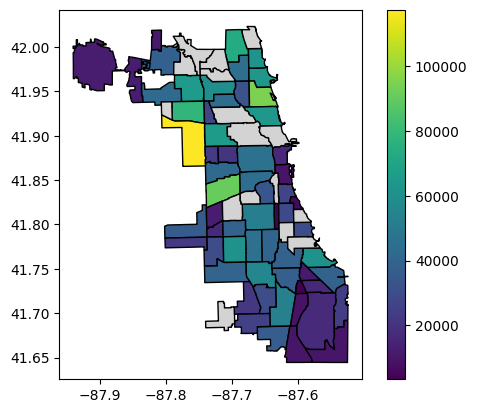

In [35]:
chicago.plot(column = 'POP2000', edgecolor = 'black',
             missing_kwds={'color': 'lightgrey'}, legend = True)

<Axes: >

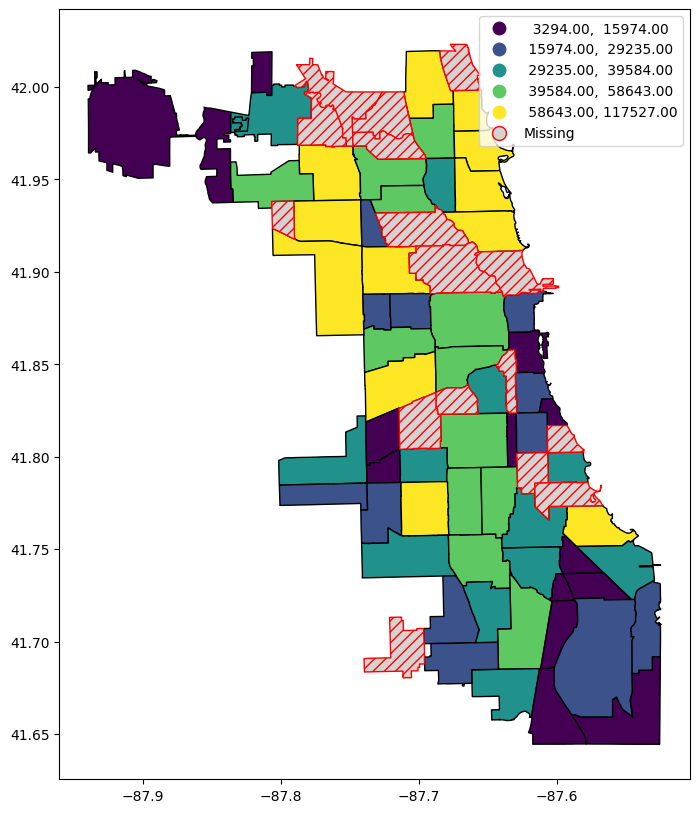

In [36]:
chicago.plot(column = 'POP2000', edgecolor = 'black', scheme = 'quantiles',
             missing_kwds={'color': 'lightgrey', 'edgecolor': 'red', 'hatch': '///', 'label': 'Missing'}, 
             legend = True, figsize=(15, 10))

### Adding multiple layers

In order to add multiple layers to the map, we need to make the sure the map has the same coordination system. 

<Axes: >

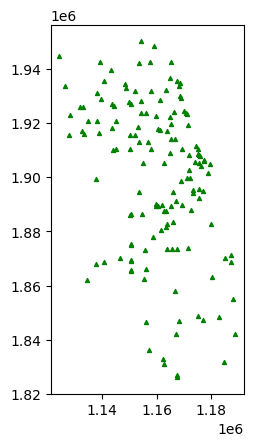

In [37]:
groceries.head()
groceries.plot(marker = '^', color = 'green', markersize = 8)

In [38]:
groceries = groceries.to_crs(chicago.crs)
groceries.head()

,OBJECTID,Ycoord,Xcoord,Status,Address,Chain,Category,geometry
0,16,41.973266,-87.657073,OPEN,"1051 W ARGYLE ST, CHICAGO, IL. 60640",VIET HOA PLAZA,None,MULTIPOINT (-87.65661 41.97321)
1,18,41.696367,-87.681315,OPEN,"10800 S WESTERN AVE, CHICAGO, IL. 60643-3226",COUNTY FAIR FOODS,None,MULTIPOINT (-87.68136 41.69713)
2,22,41.868634,-87.638638,OPEN,"1101 S CANAL ST, CHICAGO, IL. 60607-4932",WHOLE FOODS MARKET,None,MULTIPOINT (-87.63918 41.86847)
3,23,41.877590,-87.654953,OPEN,"1101 W JACKSON BLVD, CHICAGO, IL. 60607-2905",TARGET/SUPER,new,MULTIPOINT (-87.65495 41.87783)
4,27,41.737696,-87.625795,OPEN,"112 W 87TH ST, CHICAGO, IL. 60620-1318",FOOD 4 LESS,None,MULTIPOINT (-87.62715 41.73623)


<Axes: >

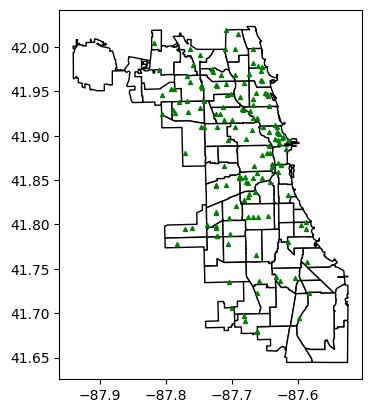

In [39]:
base = chicago.plot(color = 'white', edgecolor='black')
groceries.plot(ax = base, marker = '^', color = 'green', markersize = 8)

#### Altair Interactive plot with selection

One of the good functions in Altair is that we can combine the selection we have learned in the previous lecture with the map making. You can also use similar design on the other type of Altair plots. 

<Axes: >

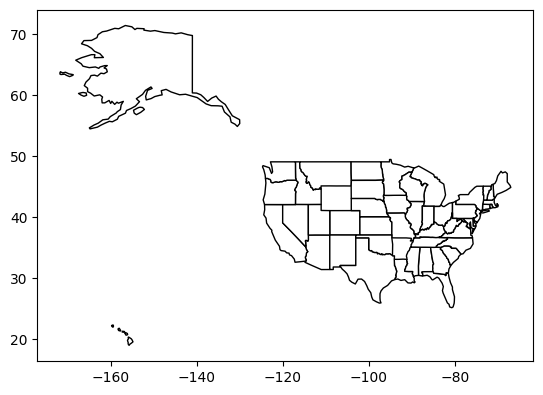

In [40]:
full.head()
full_lower = full.drop([3, 50])
full_lower.plot(color = 'white', edgecolor = 'black')

In [41]:
variable_dropdown = alt.binding_select(options = ['Violent_Crime', 'Poverty', 'Murder_Rate'],
                                       name = 'Select variable: ')
variable_select = alt.param(value = 'Violent_Crime', bind = variable_dropdown)

alt.Chart(full_lower).mark_geoshape(
    stroke = 'white'
).transform_fold(
    ['Violent_Crime', 'Poverty', 'Murder_Rate'], as_ = ['variable', 'value']
).transform_filter(
    alt.datum.variable == variable_select
).encode(
    color = alt.Color('value:Q', scale = alt.Scale(scheme = 'reds')),
    tooltip = alt.Tooltip(['State', 'variable:N', 'value:Q'])
).add_params(variable_select).project(type = 'naturalEarth1').properties(
    width = 700, height = 500
)



C:\Users\nawib\OneDrive\Documents\Northeastern\ds4200 info viz\.venv\lib\site-packages\altair\utils\data.py:71: UserWarning:

You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?

C:\Users\nawib\OneDrive\Documents\Northeastern\ds4200 info viz\.venv\lib\site-packages\altair\utils\data.py:71: UserWarning:

You passed a `<class 'narwhals.stable.v1.DataFrame'>` to `is_pandas_dataframe`.

Hint: Instead of e.g. `is_pandas_dataframe(df)`, did you mean `is_pandas_dataframe(df.to_native())`?



alt.Chart(...)

Here is another more complicated example with the earlier airport and flight data in the Altair tutorial to create flows on a map. Let me know if you are expected to do something similar in your final project.

In [42]:
# interactive selection for origin airport
# select nearest airport to mouse cursor
origin = alt.selection_point(
    on='mouseover', nearest=True,
    fields=['origin'], empty='none'
)

# shared data reference for lookup transforms
foreign = alt.LookupData(data=airports, key='iata',
                         fields=['latitude', 'longitude'])
    
alt.layer(
    # base map of the United States
    alt.Chart(alt.topo_feature(usa, 'states')).mark_geoshape(
        fill='#ddd', stroke='#fff', strokeWidth=1
    ),
    # route lines from selected origin airport to destination airports
    alt.Chart(flights).mark_rule(
        color='#000', opacity=0.35
    ).transform_filter(
        origin # filter to selected origin only
    ).transform_lookup(
        lookup='origin', from_=foreign # origin lat/lon
    ).transform_lookup(
        lookup='destination', from_=foreign, as_=['lat2', 'lon2'] # dest lat/lon
    ).encode(
        latitude='latitude:Q',
        longitude='longitude:Q',
        latitude2='lat2',
        longitude2='lon2',
    ),
    # size airports by number of outgoing routes
    # 1. aggregate flights-airport data set
    # 2. lookup location data from airports data set
    # 3. remove Puerto Rico (PR) and Virgin Islands (VI)
    alt.Chart(flights).mark_circle().transform_aggregate(
        groupby=['origin'],
        routes='count()'
    ).transform_lookup(
        lookup='origin',
        from_=alt.LookupData(data=airports, key='iata',
                             fields=['state', 'latitude', 'longitude'])
    ).transform_filter(
        'datum.state !== "PR" && datum.state !== "VI"'
    ).add_params(
        origin
    ).encode(
        latitude='latitude:Q',
        longitude='longitude:Q',
        tooltip=['origin:N', 'routes:Q'],
        size=alt.Size('routes:Q', scale=alt.Scale(range=[0, 1000]), legend=None),
        order=alt.Order('routes:Q', sort='descending') # place smaller circles on top
    )
).project(
    type='albersUsa'
).properties(
    width=900,
    height=500
).configure_view(
    stroke=None
)

alt.LayerChart(...)

#### In-class activity 2

Explore the information on 
https://www.naturalearthdata.com/downloads/ and download two datasets. For example, a world map as well as world airport locations. Try to plot the two datasets on the same map with altair. Create one static map and customized the colors or marks. Create another interactive map with tooltip and popout functions. 